### Exercise

<div class="alert-success">

1. Transform the co2 and forest variables.
2. Discretize the result chosen.
3. Make the maps for the co2 and forest variables.
4. Add another variable (merge) from the web (or any other source). Transform it , discretize it, and map it.
   
    
</div>

Para CO2

<Axes: ylabel='Classifier'>

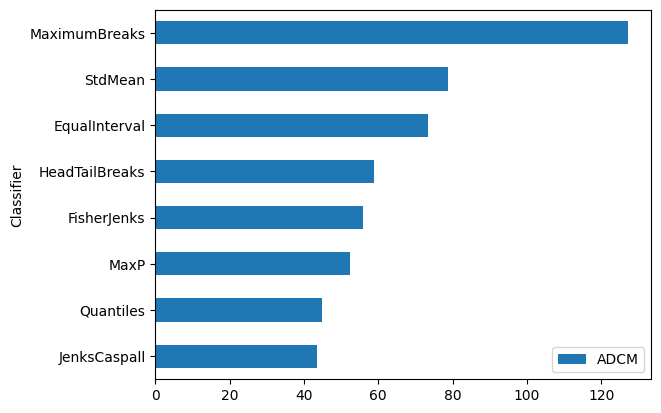

In [ ]:
theMapAndData['CO2_Qt']=QtScaled_data[:,1] #0 es para fragility, 1 es para c02, 2 es para forest

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.CO2_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

adcms.sort_values('ADCM').plot.barh(x='Classifier')

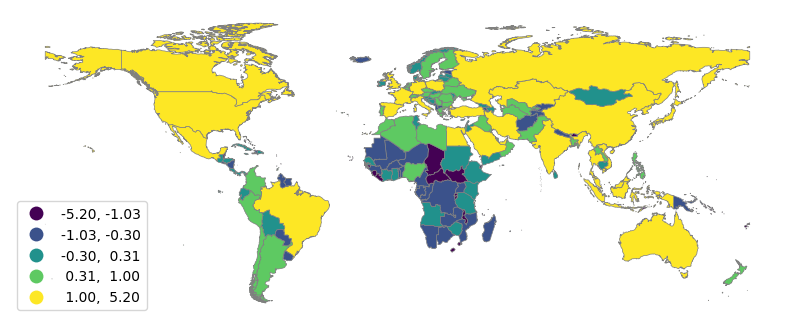

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='CO2_Qt',
                   cmap='viridis',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

Para Forest

<Axes: ylabel='Classifier'>

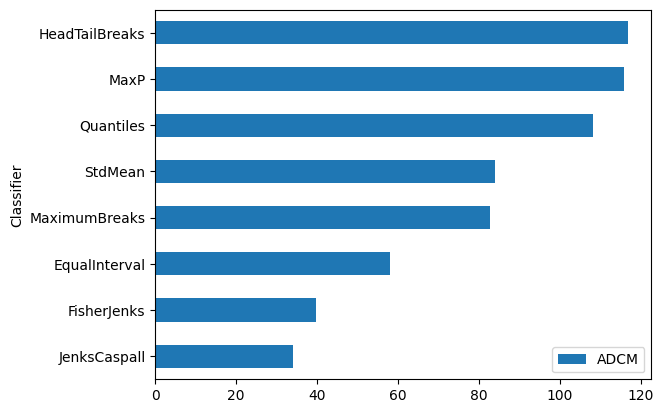

In [ ]:
theMapAndData['Forest_Qt']=QtScaled_data[:,2] #0 es para fragility, 1 es para c02, 2 es para forest

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.Forest_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

adcms.sort_values('ADCM').plot.barh(x='Classifier')

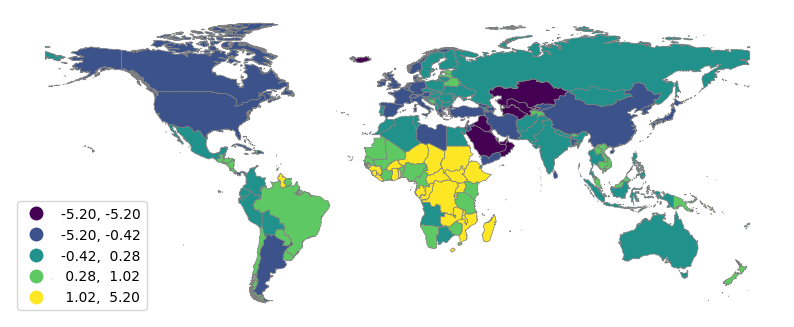

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Forest_Qt',
                   cmap='viridis',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

Agregando Nueva Variable 'Biodiversidad', extraído de: https://datacatalog.worldbank.org/search/dataset/0063384/Global-Species-Database

In [ ]:
especies=pd.read_csv('Species_Database_wb_datanam.csv')

<ipython-input-198-aac266524534>:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  especies=pd.read_csv('Species_Database_wb_datanam.csv')


In [ ]:
especies.head(5)

,group,binomial,iucn_id_no,common_name,name_language,iucn_category,iso_a3,total_area,small_range,wb_datanam,wb_iso,datanam_area,datanam_pct_area
0,Amphibians,Abavorana luctuosa,125161167.0,Purple Frog,eng,LC,IDN,128005.560000,0,Indonesia,IDN,37194.238281,29.056736
1,Amphibians,Abavorana luctuosa,125161167.0,Purple Frog,eng,LC,MYS,128005.560000,0,Malaysia,MYS,88498.500000,69.136452
2,Amphibians,Abavorana luctuosa,125161167.0,Purple Frog,eng,LC,THA,128005.560000,0,Thailand,THA,2312.827637,1.806818
3,Amphibians,Abavorana nazgul,125160424.0,Gunung Jerai Black Stream-Frog,eng,CR,MYS,7.399752,1,Malaysia,MYS,7.399752,100.000000
4,Amphibians,Acanthixalus sonjae,56054.0,Ivory Coast Wart Frog,eng,VU,CIV,6030.019000,0,Cote d'Ivoire,CIV,5699.439453,94.517769


In [ ]:
especies.shape

(533464, 13)

In [ ]:
especie1=pd.DataFrame(especies.groupby('iso_a3').count())

In [ ]:
especie1.sum()

group               533464
binomial            533464
iucn_id_no          265845
common_name         226479
name_language       226293
iucn_category       479322
total_area          533464
small_range         533464
wb_datanam          533464
wb_iso              532546
datanam_area        533464
datanam_pct_area    533464
dtype: int64

In [ ]:
especie1=pd.DataFrame(especie1['group'])

In [ ]:
especie1['Country']=especie1.index

In [ ]:
especie1

,group,Country
iso_a3,,
ABW,2982,ABW
AFG,1336,AFG
AGO,4608,AGO
AIA,724,AIA
ALA,339,ALA
...,...,...
WSM,581,WSM
YEM,1618,YEM
ZAF,4770,ZAF


In [ ]:
theMapAndData=theMapAndData.merge(especie1,left_on='iso3', right_on='Country')

In [ ]:
theMapAndData

,COUNTRY,geometry,Officialstatename,InternetccTLD,iso2,iso3,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat,CO2_Qt,Forest_Qt,group,Country
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",Antigua and Barbuda,.ag,AG,ATG,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018,-5.301130e-01,1,1_Good,-1.417436,-5.199338,760,ATG
1,AFGHANISTAN,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",The Islamic Republic of Afghanistan,.af,AF,AFG,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018,1.827146e+00,4,4_Poor,-0.312096,-0.076809,1336,AFG
2,ALGERIA,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",The People's Democratic Republic of Algeria,.dz,DZ,DZA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018,3.045198e-01,3,3_Bad,0.903225,-0.352465,1635,DZA
3,AZERBAIJAN,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",The Republic of Azerbaijan,.az,AZ,AZE,2019,73.2,35389000.0,2019,MIDDLE EAST,0.02,2018,2.336949e-01,2,2_Middle,0.282063,-0.827130,1124,AZE
4,ALBANIA,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",The Republic of Albania,.al,AL,ALB,2019,58.9,3794000.0,2019,EUROPE,0.18,2018,-4.244473e-01,1,1_Good,-0.757475,-0.106447,1315,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,ZAMBIA,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096...",The Republic of Zambia,.zm,ZM,ZMB,2019,85.7,6798000.0,2019,AFRICA,4.45,2018,8.593575e-01,3,3_Bad,-0.470874,1.386281,4700,ZMB
167,ZIMBABWE,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",The Republic of Zimbabwe,.zw,ZW,ZWE,2019,99.5,7902000.0,2019,AFRICA,1.61,2018,1.668252e+00,4,4_Poor,-0.285103,0.764170,2970,ZWE
168,SOUTH SUDAN,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ...",The Republic of South Sudan,.ss,SS,SSD,2019,112.2,1778000.0,2019,AFRICA,2.65,2015,2.590633e+00,4,4_Poor,-1.029723,1.069020,3486,SSD
169,INDONESIA,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",The Republic of Indonesia,.id,ID,IDN,2019,70.4,563543000.0,2019,EAST AND SOUTHEAST ASIA,0.39,2018,-1.391458e-16,2,2_Middle,1.597500,0.243292,9443,IDN


In [ ]:
array=theMapAndData['group'].values.reshape(theMapAndData['group'].shape[0],1)

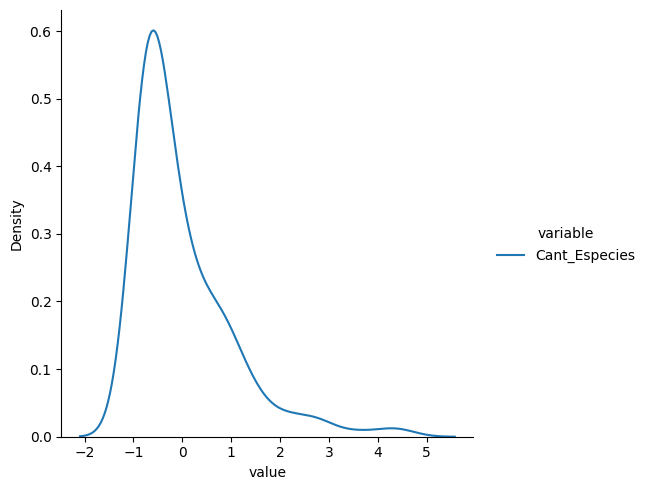

In [ ]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(array)

sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=['Cant_Especies'])),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

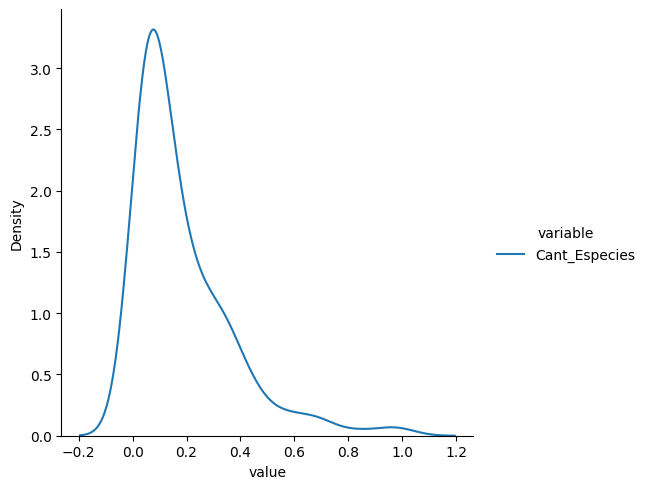

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(array)

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=['Cant_Especies'])),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

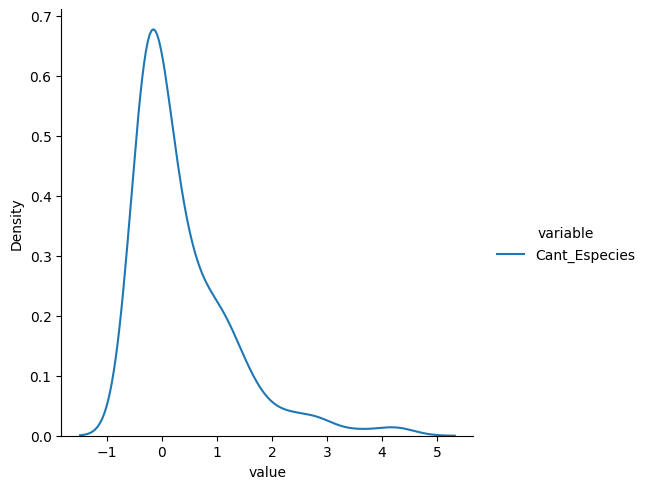

In [ ]:
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(array)

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=['Cant_Especies'])),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))



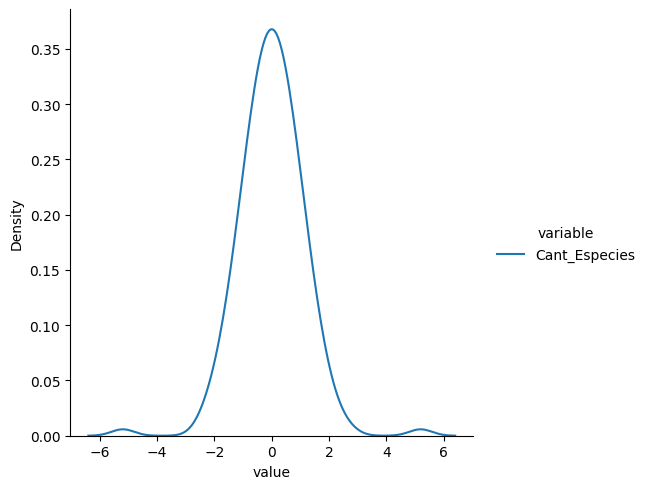

In [ ]:
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(array)

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=['Cant_Especies'])),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

theMapAndData['fragility_Qt']=QtScaled_data[:,0]

In [ ]:
theMapAndData['BioDiversidad_Qt']=QtScaled_data

<Axes: ylabel='Classifier'>

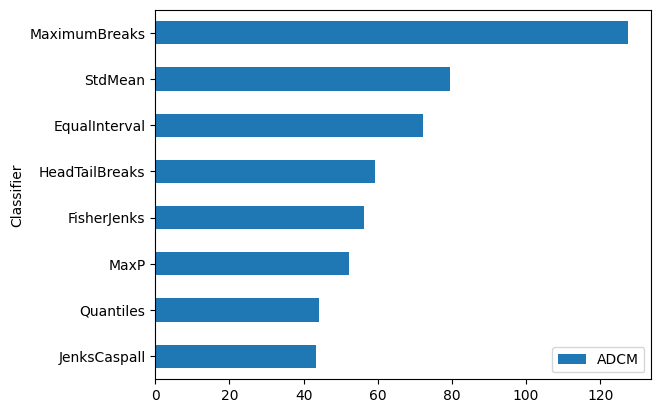

In [ ]:
np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.BioDiversidad_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

adcms.sort_values('ADCM').plot.barh(x='Classifier')

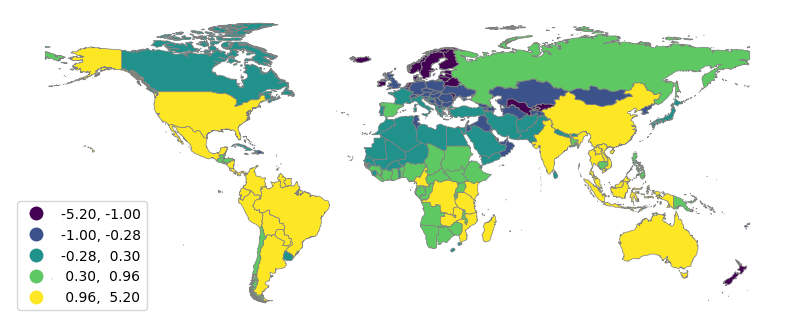

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='BioDiversidad_Qt',
                   cmap='viridis',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [ ]:
theMapAndData[theMapAndData['COUNTRY']=='PERU']

,COUNTRY,geometry,Officialstatename,InternetccTLD,iso2,iso3,fragility_date,fragility,co2,co2_date,...,ForestRev_gdp,ForestRev_date,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat,CO2_Qt,Forest_Qt,group,Country,BioDiversidad_Qt
122,PERU,"POLYGON ((-69.56750 -10.95056, -69.56844 -10.9...",The Republic of Perú,.pe,PE,PER,2019,68.2,54996000.0,2019,...,0.12,2018,2.251015,2,2_Middle,0.536656,-0.314179,11195,PER,2.251015
